In [8]:
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
PATH='data/'

In [3]:
data=pd.read_csv(PATH+'channels_params.csv',index_col='Index')

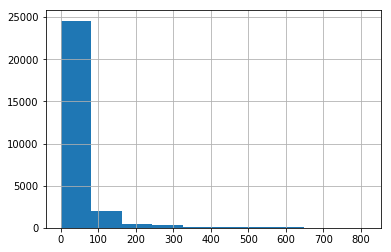

In [9]:
data['values__standard_deviation'].hist()

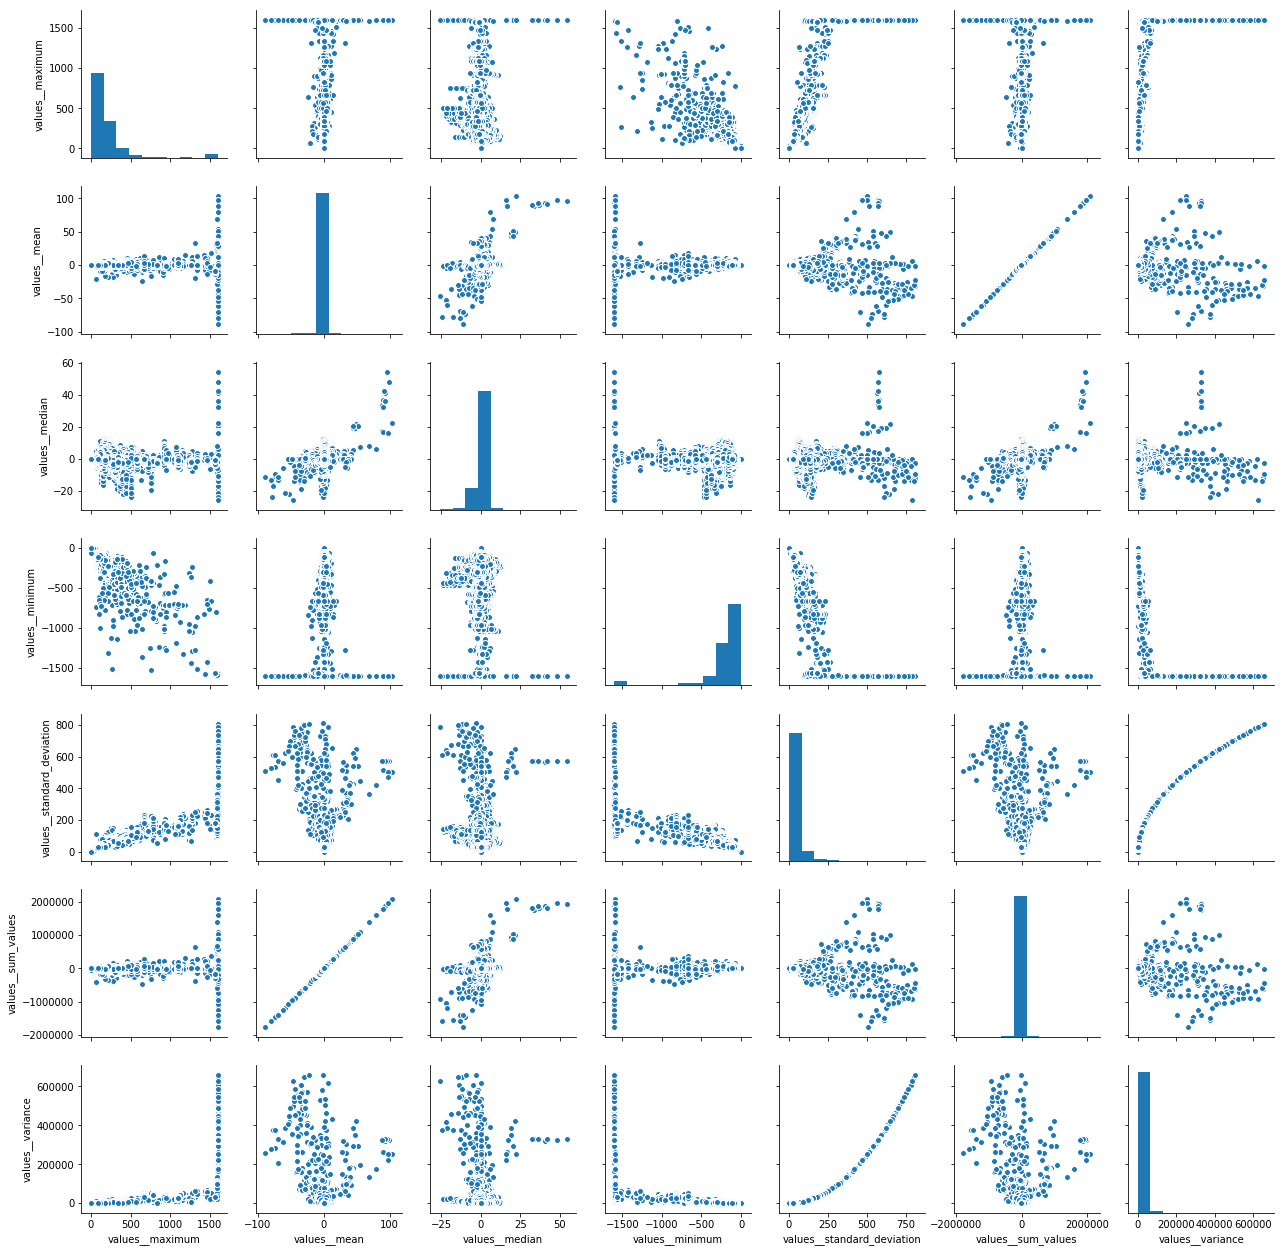

In [12]:
sns.pairplot(data.drop(['id','Channel'],axis=1))

In [13]:
data.head()

,id,values__maximum,values__mean,values__median,values__minimum,values__standard_deviation,values__sum_values,values__variance,File,Channel
Index,,,,,,,,,,
0,11,1597.705078,4.191101,0.000000,-1598.974609,274.081801,83822.021484,75120.833550,1.edf,19
1,12,234.472656,-1.257080,-0.439453,-694.921875,60.970290,-25141.601562,3717.376237,1.edf,19
2,13,153.759766,0.650273,-0.146484,-130.810547,27.052274,13005.468750,731.825526,1.edf,19
3,14,126.318359,-1.215317,-1.269531,-130.810547,25.047481,-24306.347656,627.376304,1.edf,19
4,15,126.318359,-0.240637,-0.683594,-130.810547,25.056851,-4812.744141,627.845803,1.edf,19


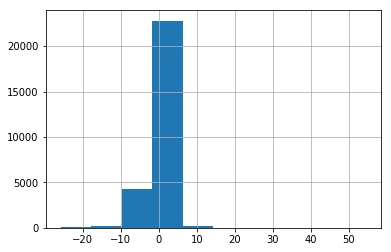

In [14]:
data['values__median'].hist()

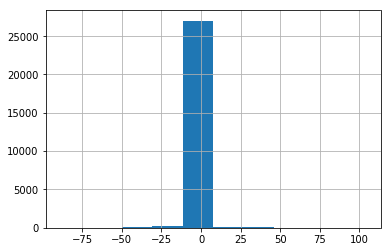

In [15]:
data['values__mean'].hist()

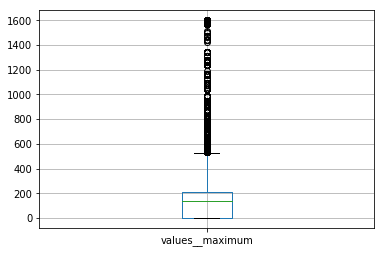

In [13]:
data.boxplot(column='values__maximum')